### Entrenamiento del MLP

## Trabajo independiente

1. Establezca un conjunto de datos usando la generación aleatoria
2. Diseñe y entrene diferentes arquitecturas de red neuronal multicapa
3. Analice los resultados de las diferentes arquitecturas. Establezca relaciones con el tamaño de la red, la cantidad de datos y el desempeño (exactitud)

# Trabajo de clase

El siguiente codigo genera un arquitectura de clasificación, tomando como base un dataset de la libreria de sklearn (diabete), el codigo analiza tres arquitecturas (Pequeña, Median y Grande) generando una tabla y grafica (histograma) con las correspondientes conclusiones. 

CARGANDO BASES DE DATOS
Tamaño total del dataset: 442 muestras.
Tamaño de entrenamiento: (309, 10)
Tamaño de prueba: (133, 10)

Entrenando modelo: MLP_PEQUEÑA...
-> Exactitud en prueba: 0.9023, Parámetros: 241

Entrenando modelo: MLP_MEDIANA...
-> Exactitud en prueba: 0.9248, Parámetros: 6201

Entrenando modelo: MLP_GRANDE...
-> Exactitud en prueba: 0.9323, Parámetros: 125901


--- RESUMEN DE DESEMPEÑO DE ARQUITECTURAS MLP ---
| Modelo      | Arquitectura    |   Capas Ocultas |   Parámetros |   Exactitud_Prueba |   Tiempo_Entrenamiento (s) |
|:------------|:----------------|----------------:|-------------:|-------------------:|---------------------------:|
| MLP_GRANDE  | (500, 200, 100) |               3 |       125901 |             0.9323 |                     0.1626 |
| MLP_MEDIANA | (100, 50)       |               2 |         6201 |             0.9248 |                     0.1130 |
| MLP_PEQUEÑA | (20,)           |               1 |          241 |             0.9023 |              

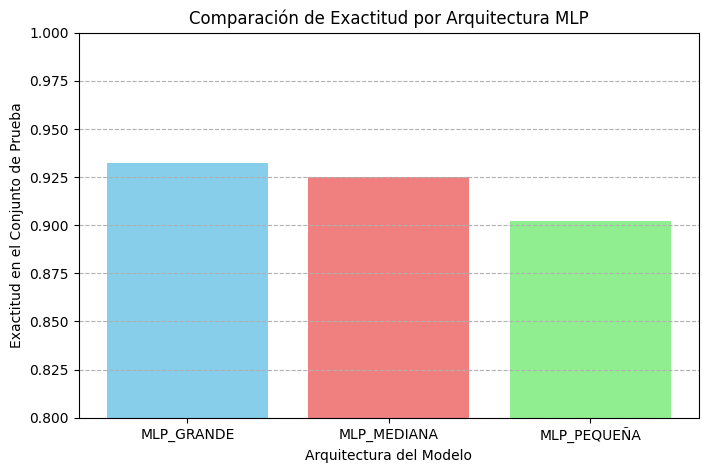

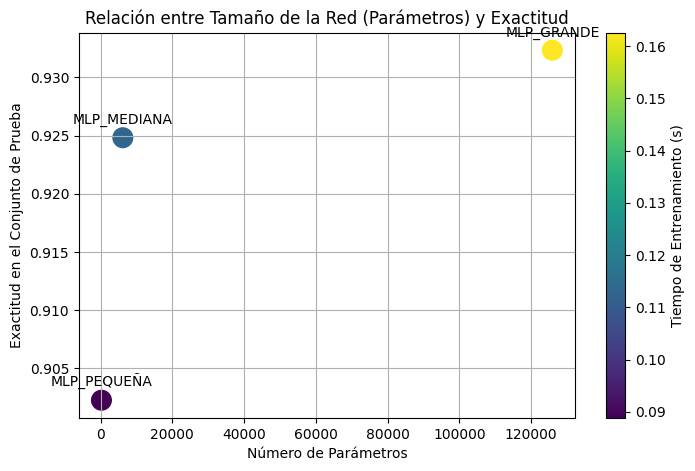

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import time
import warnings
warnings.filterwarnings('ignore')

# --- 1. ESTABLECER UN CONJUNTO DE DATOS ALEATORIO ---
print("="*60)
print("CARGANDO BASES DE DATOS")
print("="*60)

dataset = datasets.load_diabetes()
X = dataset.data
df = pd.DataFrame(X, columns=dataset.feature_names)
y= df.shape[1]

# Parámetros del dataset
N_SAMPLES = df.shape[0]  # Cantidad de datos
N_FEATURES =y # Cantidad de características
RANDOM_STATE = 42

# Generar datos sintéticos para clasificación binaria
X, y = make_classification(
    n_samples=N_SAMPLES,
    n_features=N_FEATURES,
    n_classes=2,
    n_informative=10,  # Características realmente útiles
    n_redundant=0,
    random_state=RANDOM_STATE
)

# Dividir el conjunto de datos
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=RANDOM_STATE
)

print(f"Tamaño total del dataset: {N_SAMPLES} muestras.")
print(f"Tamaño de entrenamiento: {X_train.shape}")
print(f"Tamaño de prueba: {X_test.shape}\n")

# --- 2. DISEÑAR Y ENTRENAR DIFERENTES ARQUITECTURAS MLP ---

# Definición de las arquitecturas (hidden_layer_sizes)
# Cada tupla representa el número de neuronas en cada capa oculta.

architectures = {
    "MLP_PEQUEÑA": (20,),           # 1 capa oculta con 20 neuronas (similar al n° de features)
    "MLP_MEDIANA": (100, 50),       # 2 capas ocultas: 100 y 50 neuronas
    "MLP_GRANDE": (500, 200, 100)  # 3 capas ocultas: 500, 200 y 100 neuronas
}

# Parámetros comunes de entrenamiento
common_params = {
    'max_iter': 300,
    'solver': 'adam',
    'random_state': RANDOM_STATE,
    'learning_rate_init': 0.001
}

results = []

for name, layers in architectures.items():
    print(f"Entrenando modelo: {name}...")
    
    # Inicializar el modelo con la arquitectura específica
    model = MLPClassifier(hidden_layer_sizes=layers, **common_params)
    
    start_time = time.time()
    
    # Entrenar el modelo
    model.fit(X_train, y_train)
    
    end_time = time.time()
    
    # Predecir y evaluar
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    training_time = end_time - start_time
    
    # Contar el número total de parámetros (aproximación)
    # n° de parámetros = sum(w*b)
    n_params = sum(np.prod(w.shape) + np.prod(b.shape) 
                   for w, b in zip(model.coefs_, model.intercepts_))
    
    results.append({
        "Modelo": name,
        "Arquitectura": layers,
        "Capas Ocultas": len(layers),
        "Parámetros": n_params,
        "Exactitud_Prueba": accuracy,
        "Tiempo_Entrenamiento (s)": training_time
    })
    
    print(f"-> Exactitud en prueba: {accuracy:.4f}, Parámetros: {n_params}\n")

# --- 3. ANALIZAR LOS RESULTADOS DE LAS DIFERENTES ARQUITECTURAS ---

df_results = pd.DataFrame(results)
df_results = df_results.sort_values(by='Exactitud_Prueba', ascending=False).reset_index(drop=True)

print("\n--- RESUMEN DE DESEMPEÑO DE ARQUITECTURAS MLP ---")
print(df_results.to_markdown(index=False, floatfmt=".4f"))

# Visualización de la Exactitud
plt.figure(figsize=(8, 5))
plt.bar(df_results['Modelo'], df_results['Exactitud_Prueba'], color=['skyblue', 'lightcoral', 'lightgreen'])
plt.ylim(0.8, 1.0)
plt.title('Comparación de Exactitud por Arquitectura MLP')
plt.ylabel('Exactitud en el Conjunto de Prueba')
plt.xlabel('Arquitectura del Modelo')
plt.grid(axis='y', linestyle='--')
plt.show()

# Análisis de relaciones (Tamaño vs. Exactitud)
plt.figure(figsize=(8, 5))
plt.scatter(df_results['Parámetros'], df_results['Exactitud_Prueba'], 
            c=df_results['Tiempo_Entrenamiento (s)'], cmap='viridis', s=200)
for i, row in df_results.iterrows():
    plt.annotate(row['Modelo'], (row['Parámetros'], row['Exactitud_Prueba']), textcoords="offset points", xytext=(0,10), ha='center')

plt.title('Relación entre Tamaño de la Red (Parámetros) y Exactitud')
plt.xlabel('Número de Parámetros')
plt.ylabel('Exactitud en el Conjunto de Prueba')
plt.colorbar(label='Tiempo de Entrenamiento (s)')
plt.grid(True)
plt.show()